# Visualizing FGSM attacks on binned histone modification data
Specifically attacked AttentiveChrome, but these inputs are used for both DeepChrome, DeepDiffChrome, and many other deep learning models in genomics.

In [1]:
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

SMALL_SIZE = 30
MEDIUM_SIZE = 35
BIGGER_SIZE = 40

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Load saved data
Load a dataframe where 100 consecutive rows are the same GeneID (TODO: convert from float to int) as there are 100 bins per histone modification (HM) per gene. The 5 "O" columns are the original input data, the "A" columns are the adversarially generated (+/- 1) inputs, the "e" columns are the steps taken (epsilon) for those columns (TODO: these don't show bins that are lower bounded @ 0, maybe we want to change this to show how many get lower bounded?), and finally the "g" column is the gradient for each bin.

In [2]:
CELL_LINE = 'E094'

# load standard model
vis_output = np.load('./Results_all_fgsm/' + CELL_LINE + 'vis_output.npy')
COLS = (['GeneID',
         'O1','O2','O3','O4','O5',
         'A1','A2','A3','A4','A5',
         'e1','e2','e3','e4','e5',
         'g1','g2','g3','g4','g5',
         'ao1', 'ao2', 'ao3', 'ao4', 'ao5',
         'a1','a2','a3','a4','a5',
         'y','yho','yha',
        ])

df = pd.DataFrame(vis_output, columns=COLS)

print(len(df[df['y'] == 0.0])/len(df)*100, '% Labels 0')
print('Original predictions max:', np.round(max(df['yho']),3), ' min:', np.round(min(df['yho']), 3), ' avg:', np.round(np.mean(df['yho']), 3))
print('Attacked predictions max:', np.round(max(df['yha']),3), ' min:', np.round(min(df['yha']), 3), ' avg:', np.round(np.mean(df['yha']), 3))

df.head()

83.57575757575758 % Labels 0
Original predictions max: 0.488  min: 0.023  avg: 0.21
Attacked predictions max: 0.539  min: 0.016  avg: 0.342


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
0,172936.0,1.0,2.0,5.0,2.0,1.0,0.0,3.0,6.0,3.0,...,0.003430,0.004279,0.002870,0.003046,0.003257,0.003519,0.003846,0.0,0.351574,0.458099
1,172936.0,1.0,6.0,8.0,2.0,1.0,0.0,7.0,9.0,1.0,...,0.008848,0.006624,0.005046,0.004650,0.006164,0.007555,0.006425,0.0,0.351574,0.458099
2,172936.0,1.0,8.0,5.0,2.0,0.0,0.0,9.0,6.0,1.0,...,0.008962,0.008494,0.006830,0.007328,0.007884,0.009115,0.009433,0.0,0.351574,0.458099
3,172936.0,0.0,6.0,7.0,10.0,1.0,0.0,7.0,8.0,9.0,...,0.006894,0.007138,0.008871,0.008923,0.008978,0.009026,0.009069,0.0,0.351574,0.458099
4,172936.0,1.0,9.0,8.0,8.0,2.0,0.0,8.0,9.0,7.0,...,0.008049,0.008759,0.009114,0.009166,0.009235,0.009328,0.009458,0.0,0.351574,0.458099


In [3]:
# load robust model (adversarial training)
vis_output = np.load('./Results_all_adv_trained/' + CELL_LINE + 'vis_output.npy')
COLS = (['GeneID',
         'O1','O2','O3','O4','O5',
         'A1','A2','A3','A4','A5',
         'e1','e2','e3','e4','e5',
         'g1','g2','g3','g4','g5',
         'ao1', 'ao2', 'ao3', 'ao4', 'ao5',
         'a1','a2','a3','a4','a5',
         'y','yho','yha',
        ])

df_robust = pd.DataFrame(vis_output, columns=COLS)

print(len(df_robust[df_robust['y'] == 0.0])/len(df_robust)*100, '% Labels 0')
print('Original predictions max:', np.round(max(df_robust['yho']),3), ' min:', np.round(min(df_robust['yho']), 3), ' avg:', np.round(np.mean(df_robust['yho']), 3))
print('Attacked predictions max:', np.round(max(df_robust['yha']),3), ' min:', np.round(min(df_robust['yha']), 3), ' avg:', np.round(np.mean(df_robust['yha']), 3))

df_robust.head()

83.57575757575758 % Labels 0
Original predictions max: 0.381  min: 0.12  avg: 0.229
Attacked predictions max: 0.381  min: 0.12  avg: 0.231


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
0,172936.0,1.0,2.0,5.0,2.0,1.0,2.0,3.0,4.0,3.0,...,0.010101,0.010303,0.010352,0.010149,0.009994,0.010082,0.010384,0.0,0.380202,0.380432
1,172936.0,1.0,6.0,8.0,2.0,1.0,2.0,7.0,7.0,3.0,...,0.009928,0.009548,0.010249,0.010110,0.010446,0.009937,0.009439,0.0,0.380202,0.380432
2,172936.0,1.0,8.0,5.0,2.0,0.0,2.0,9.0,6.0,3.0,...,0.010103,0.009866,0.009793,0.010137,0.010351,0.010230,0.009946,0.0,0.380202,0.380432
3,172936.0,0.0,6.0,7.0,10.0,1.0,0.0,7.0,8.0,9.0,...,0.009882,0.009977,0.009673,0.009701,0.009915,0.009958,0.010035,0.0,0.380202,0.380432
4,172936.0,1.0,9.0,8.0,8.0,2.0,2.0,10.0,9.0,7.0,...,0.009904,0.010036,0.010051,0.009902,0.009836,0.009938,0.010058,0.0,0.380202,0.380432


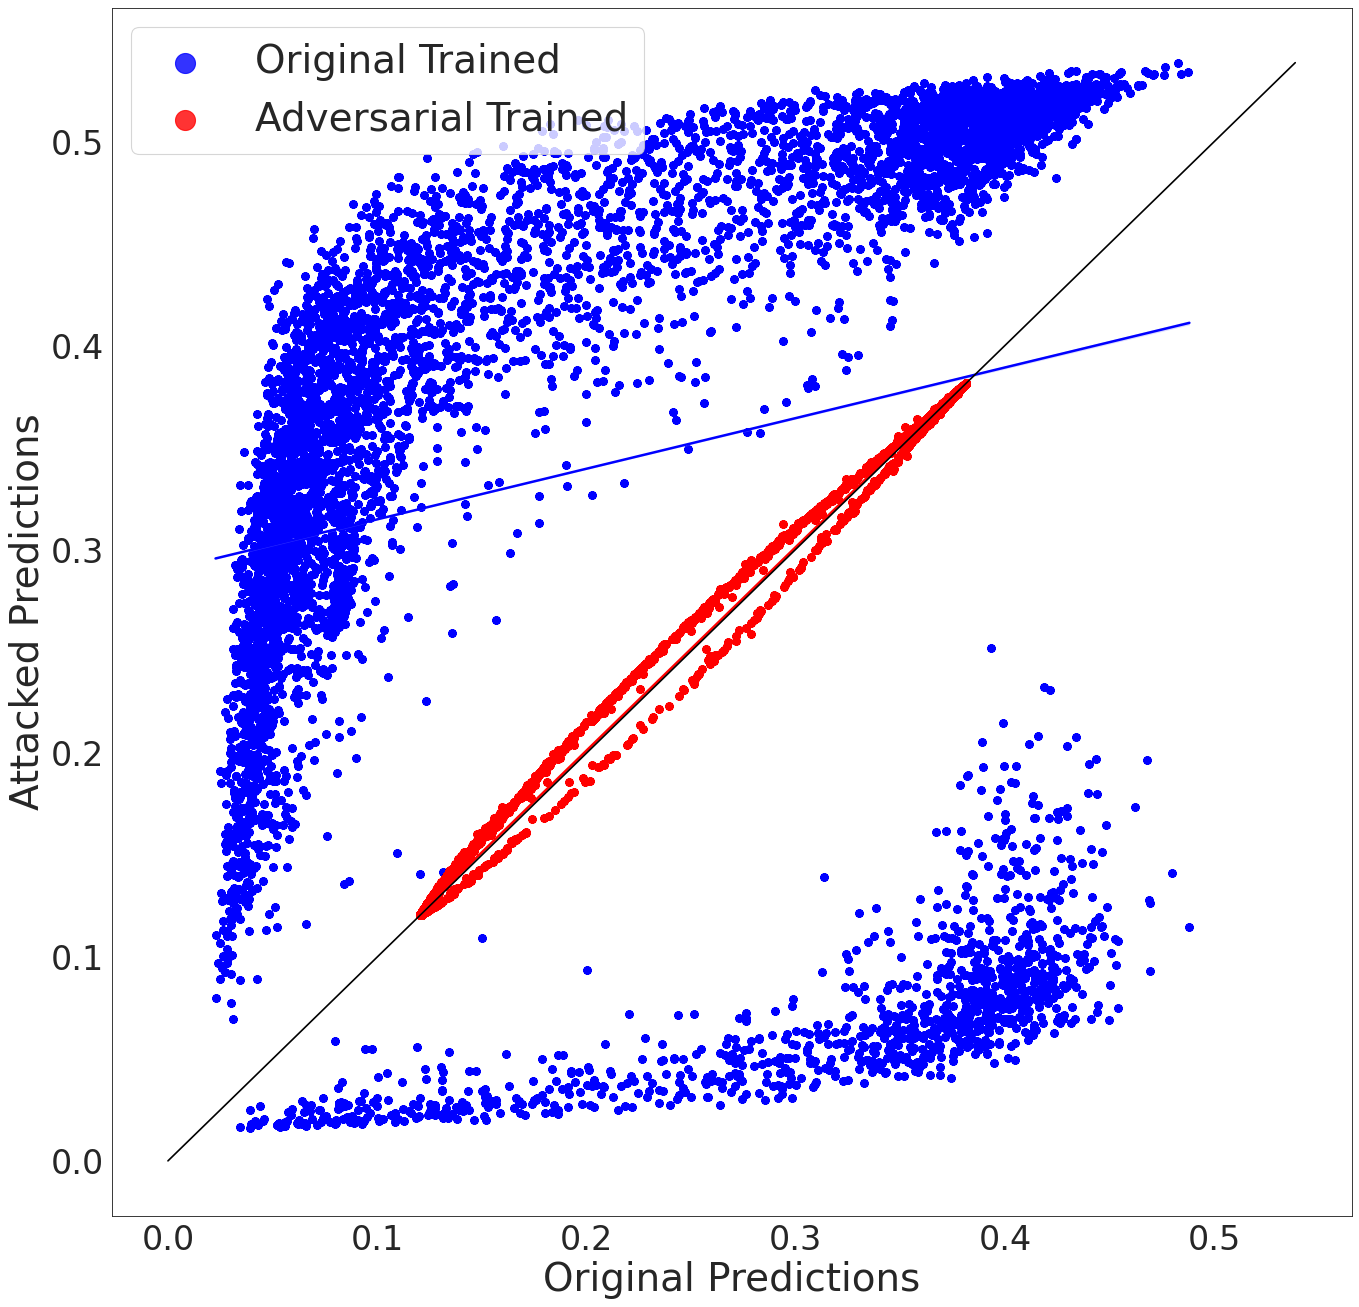

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
sns.set_style(style='white') #style='white' or 'darkgrid'
#plt.xlabel("Gene Expression Predictions (Sigmoid Output)")
#plt.ylabel("Frequency")
plt.xlabel("Original Predictions")
plt.ylabel("Attacked Predictions")
sns.regplot(x=np.array(df['yho']), y=np.array(df['yha']), color='b', label='Original Trained')
sns.regplot(x=np.array(df_robust['yho']), y=np.array(df_robust['yha']), color='r', label='Adversarial Trained')
sns.lineplot(x=[0,np.max(df['yha'])],y=[0,np.max(df['yha'])], color='k')
#sns.distplot(np.array(df['yho']), label="Original Predictions")
#sns.distplot(np.array(df['yha']), label="Attacked Predictions")
plt.legend(loc="upper left", markerscale=3)
plt.show()

plt.cla()   # Clear axis
plt.clf()   # Clear figure

Let's find the points with the most extreme and least extreme prediction changes in both directions.

In [17]:
print(np.max(np.array(df['yha'])-np.array(df['yho'])))
print(np.argmax(np.array(df['yha'])-np.array(df['yho']))/100)

print(np.min(np.array(df['yha'])-np.array(df['yho'])))
print(np.argmin(np.array(df['yha'])-np.array(df['yho']))/100)

print(np.min(np.abs(np.array(df['yha'])-np.array(df['yho']))))
print(np.argmin(np.abs(np.array(df['yha'])-np.array(df['yho'])))/100)

0.3873541131615639
3055.0
-0.3806874305009842
914.0
0.01006673276424408
6375.0


Now lets load attack and original beta attention maps as well (saved to a txt file):

In [13]:
beta_df = pd.read_csv('./Results_all_fgsm/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/beta_attention.txt', header=None, index_col=0)
beta_df.head()

,1,2,3,4,5
0,,,,,
172936,0.238711,0.181489,0.174499,0.169626,0.235674
172938,0.228813,0.173475,0.188018,0.186637,0.223058
172939,0.238666,0.194556,0.188789,0.166021,0.211967
172940,0.230300,0.174225,0.187160,0.197728,0.210587
172943,0.163862,0.162109,0.188297,0.206661,0.279071


In [14]:
orig_beta_df = pd.read_csv('./Results_all_fgsm/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
orig_beta_df.head()

,1,2,3,4,5
0,,,,,
172936,0.252679,0.175832,0.170981,0.155651,0.244856
172938,0.185108,0.137749,0.163243,0.218612,0.295288
172939,0.219250,0.191016,0.207510,0.152948,0.229276
172940,0.218364,0.148174,0.169734,0.210764,0.252964
172943,0.206743,0.195605,0.202890,0.175310,0.219452


In [15]:
beta_df_robust = pd.read_csv('./Results_all_adv_trained/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/beta_attention.txt', header=None, index_col=0)
beta_df_robust.head()

,1,2,3,4,5
0,,,,,
172936,0.190510,0.199465,0.275482,0.130275,0.204268
172938,0.070557,0.085776,0.152383,0.579733,0.111551
172939,0.186777,0.196196,0.273255,0.135352,0.208420
172940,0.070612,0.085773,0.152377,0.579662,0.111577
172943,0.118318,0.134923,0.217133,0.351873,0.177753


In [16]:
orig_beta_df_robust = pd.read_csv('./Results_all_adv_trained/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
orig_beta_df_robust.head()

,1,2,3,4,5
0,,,,,
172936,0.190273,0.199367,0.275402,0.130428,0.204530
172938,0.070408,0.085608,0.152035,0.580550,0.111400
172939,0.186462,0.195891,0.272842,0.135764,0.209041
172940,0.070452,0.085636,0.151971,0.580485,0.111455
172943,0.122928,0.139473,0.222257,0.332181,0.183160


### Plot all data in 1 fig

NOTES:
- it seems most of the bins are non-peaks, maybe thats why non-peak area attacks have a much larger effect - there are just more of them.
- as expected, the adversarial example looks identical - crazy how it performs so much worse.
- seems there is noticable, but very, very slight change in attention - corresponds to max peak region!
- it seems the FGSM attack just moves the confidence in direction away from the mean by small amounts --> all predictions that were originally close to the mean will flip and all incorrect predictions will become even more incorrect.

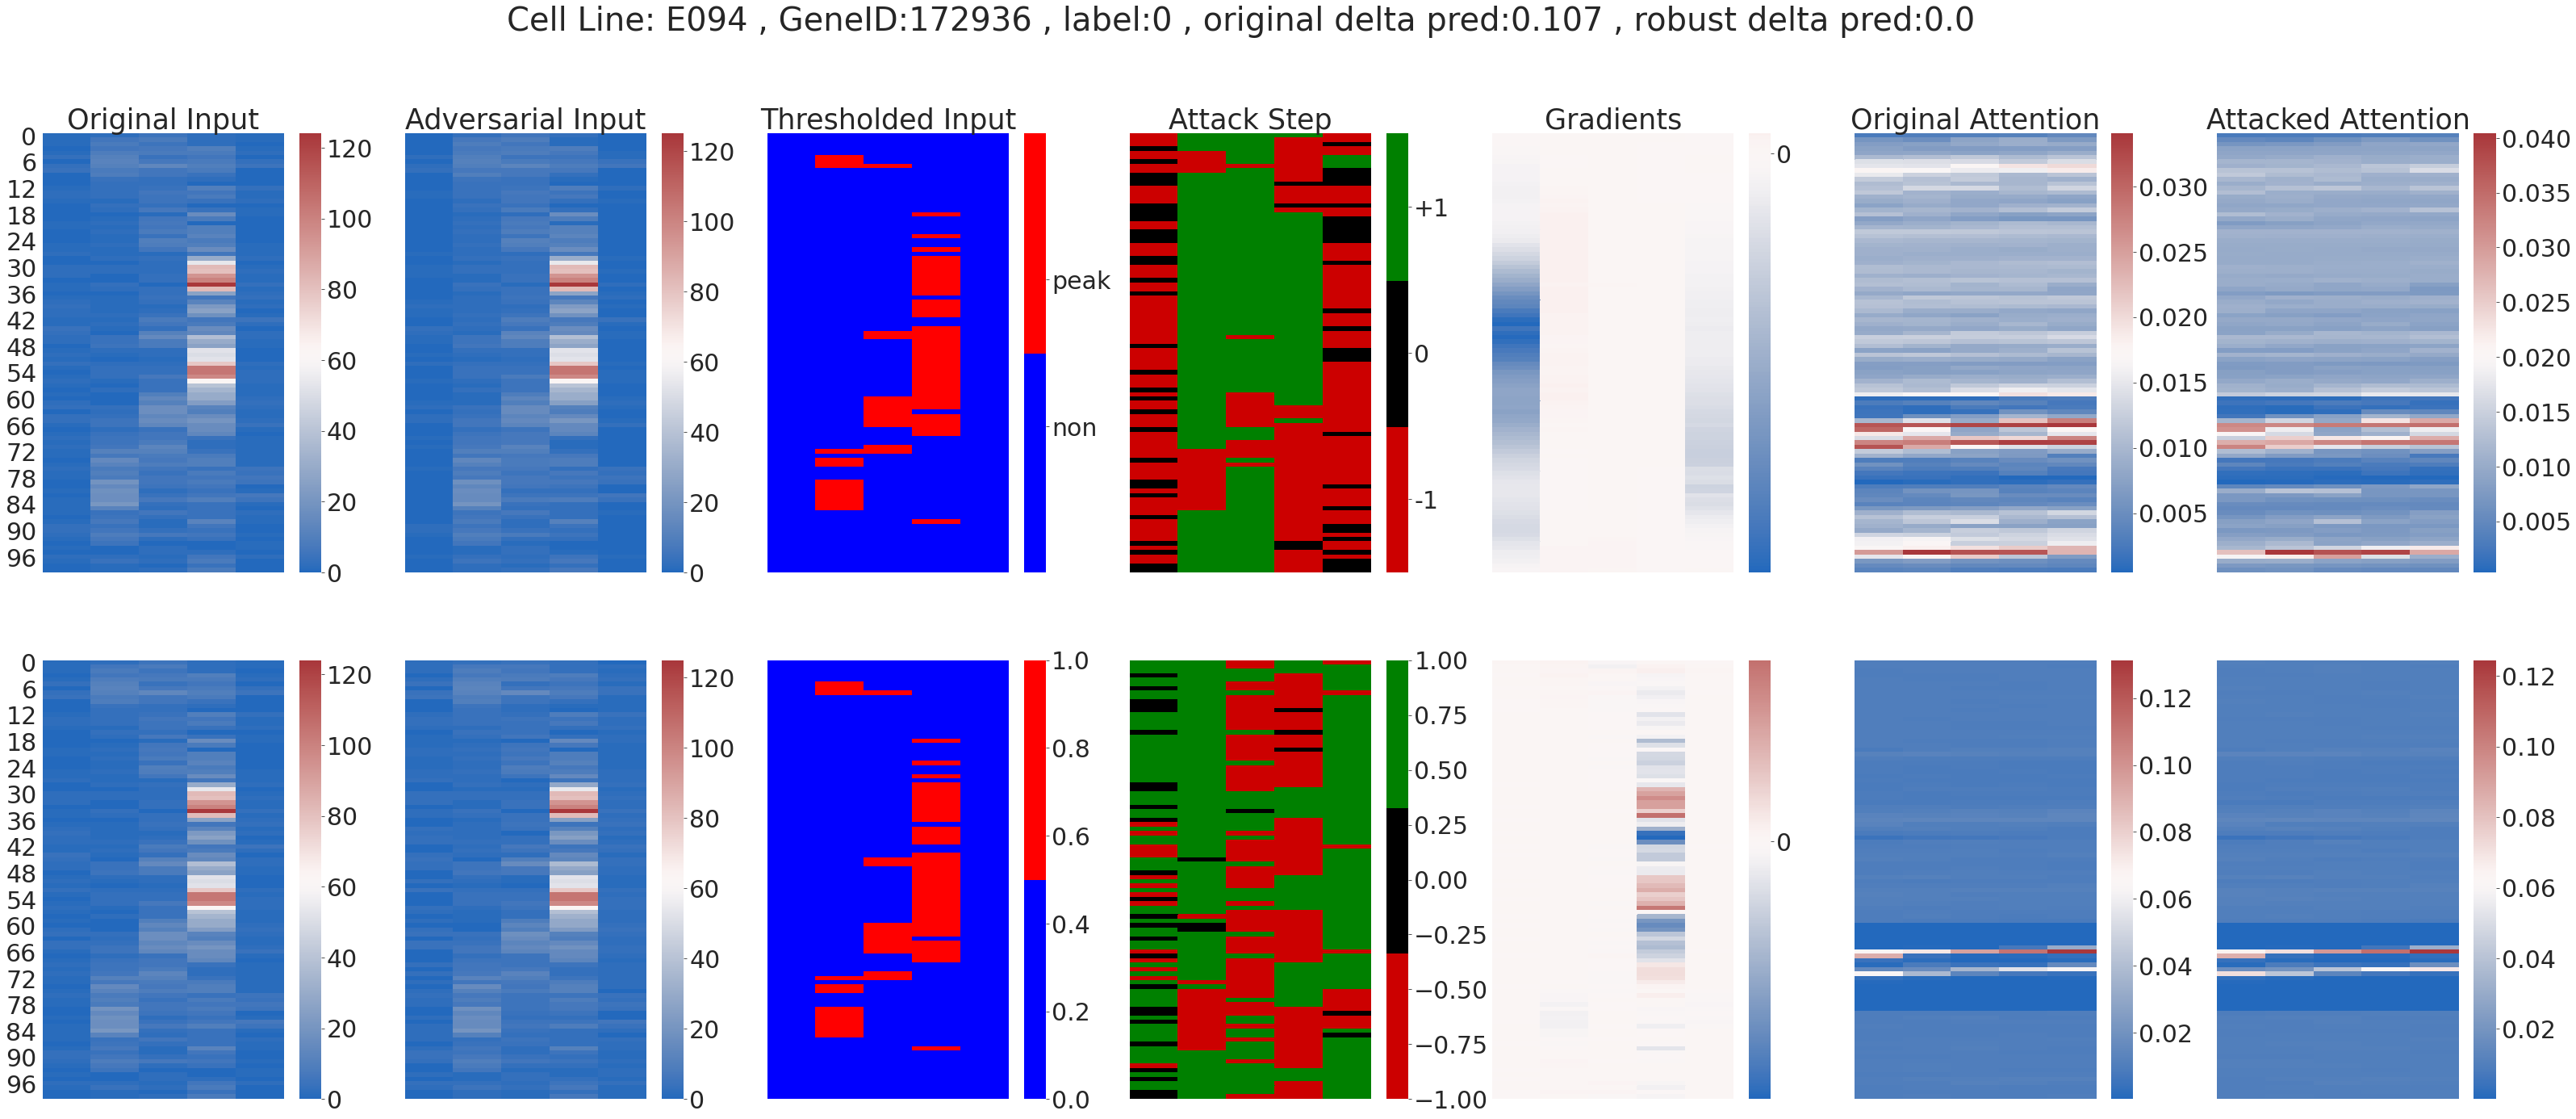

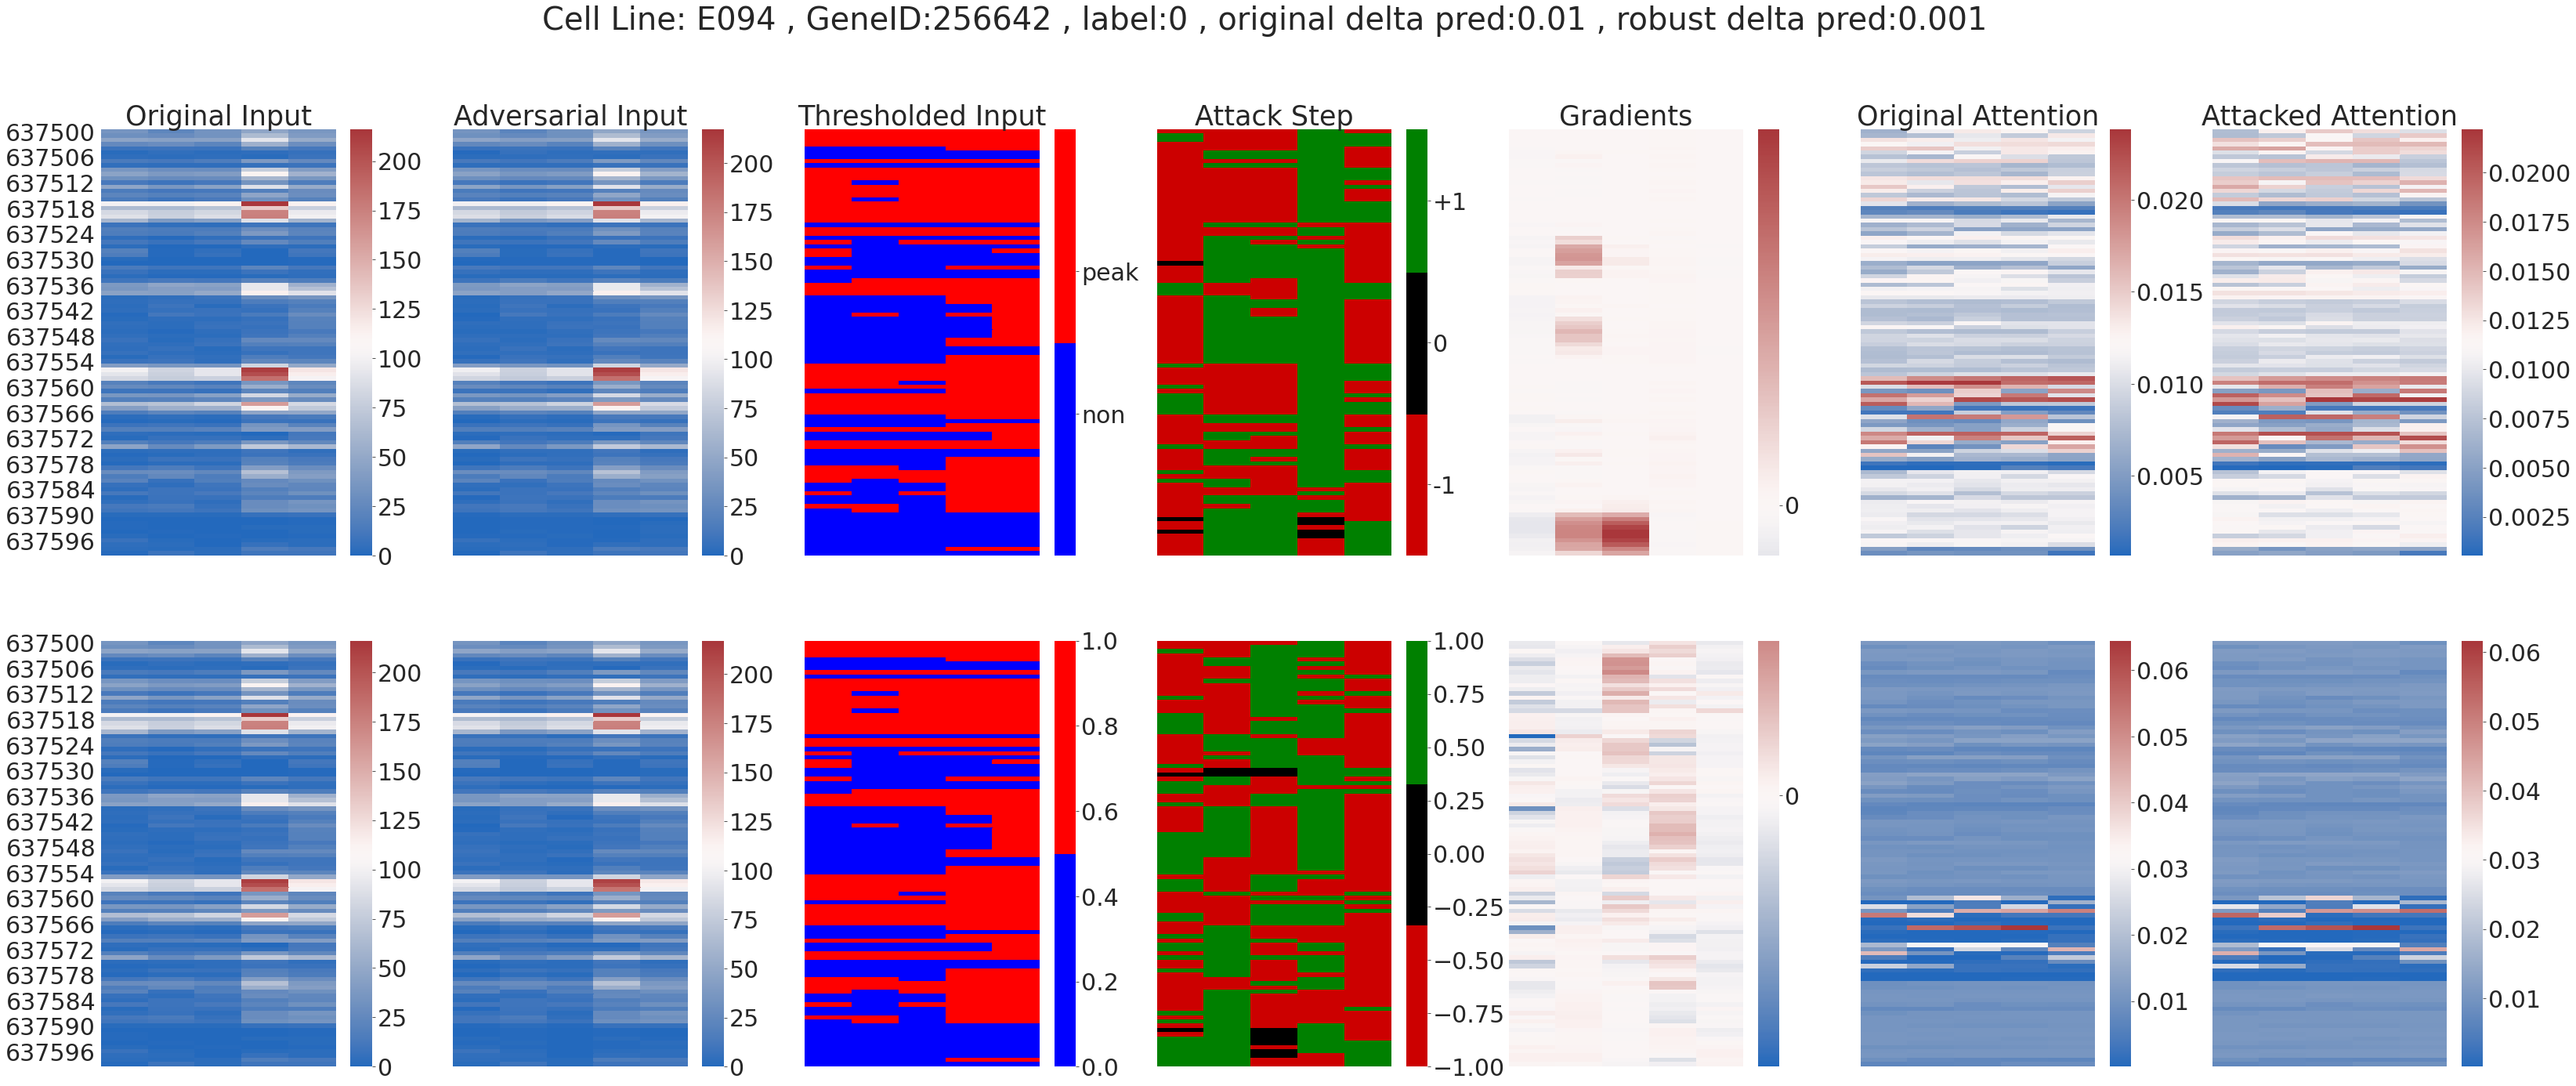

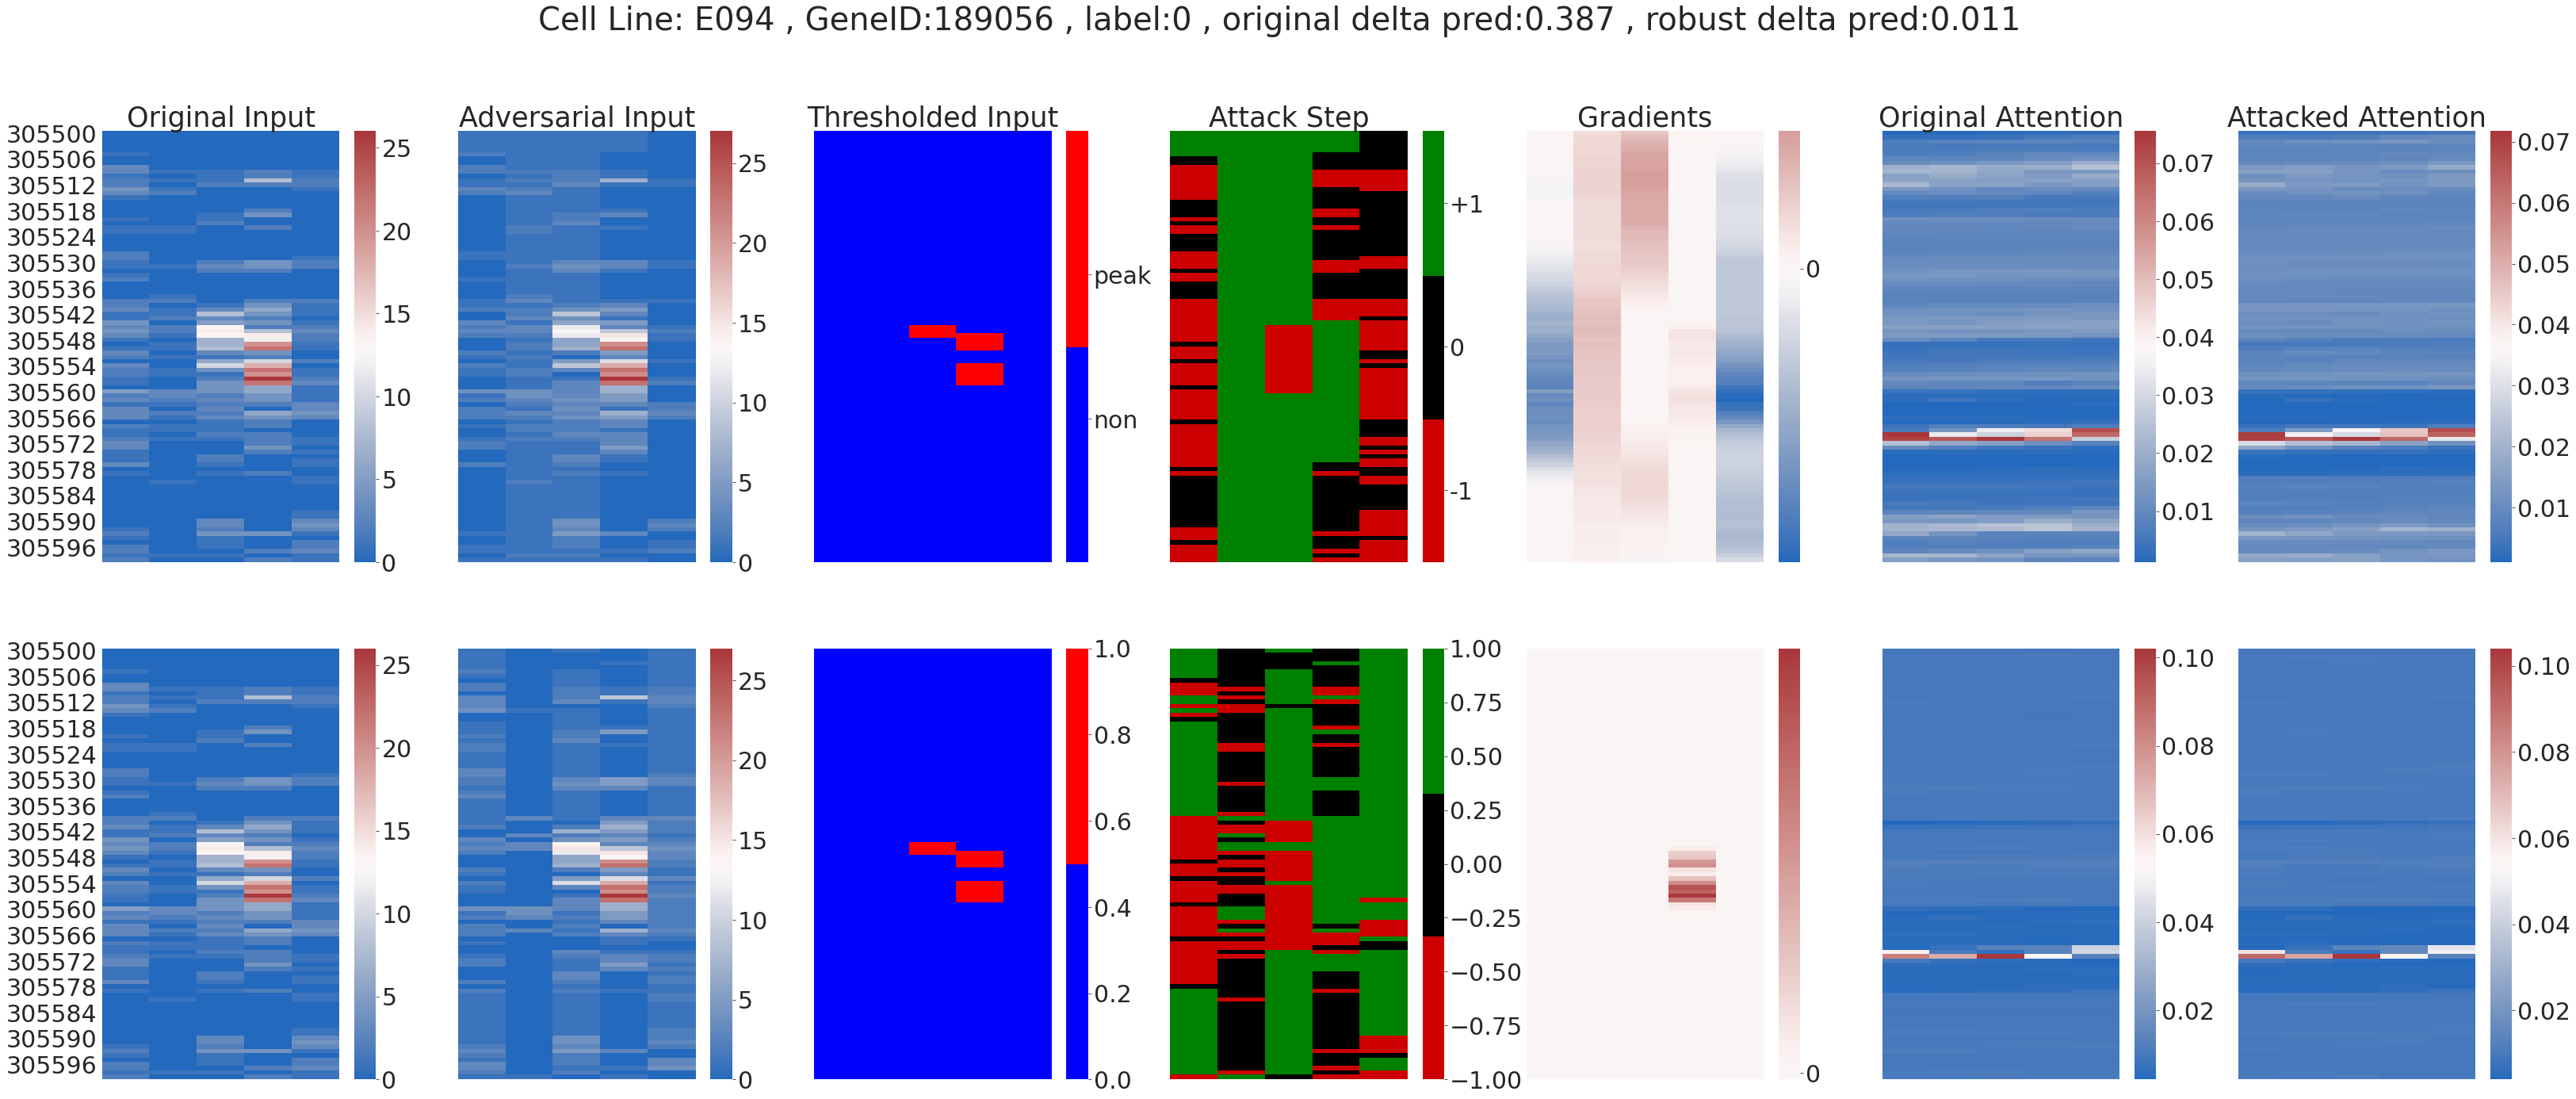

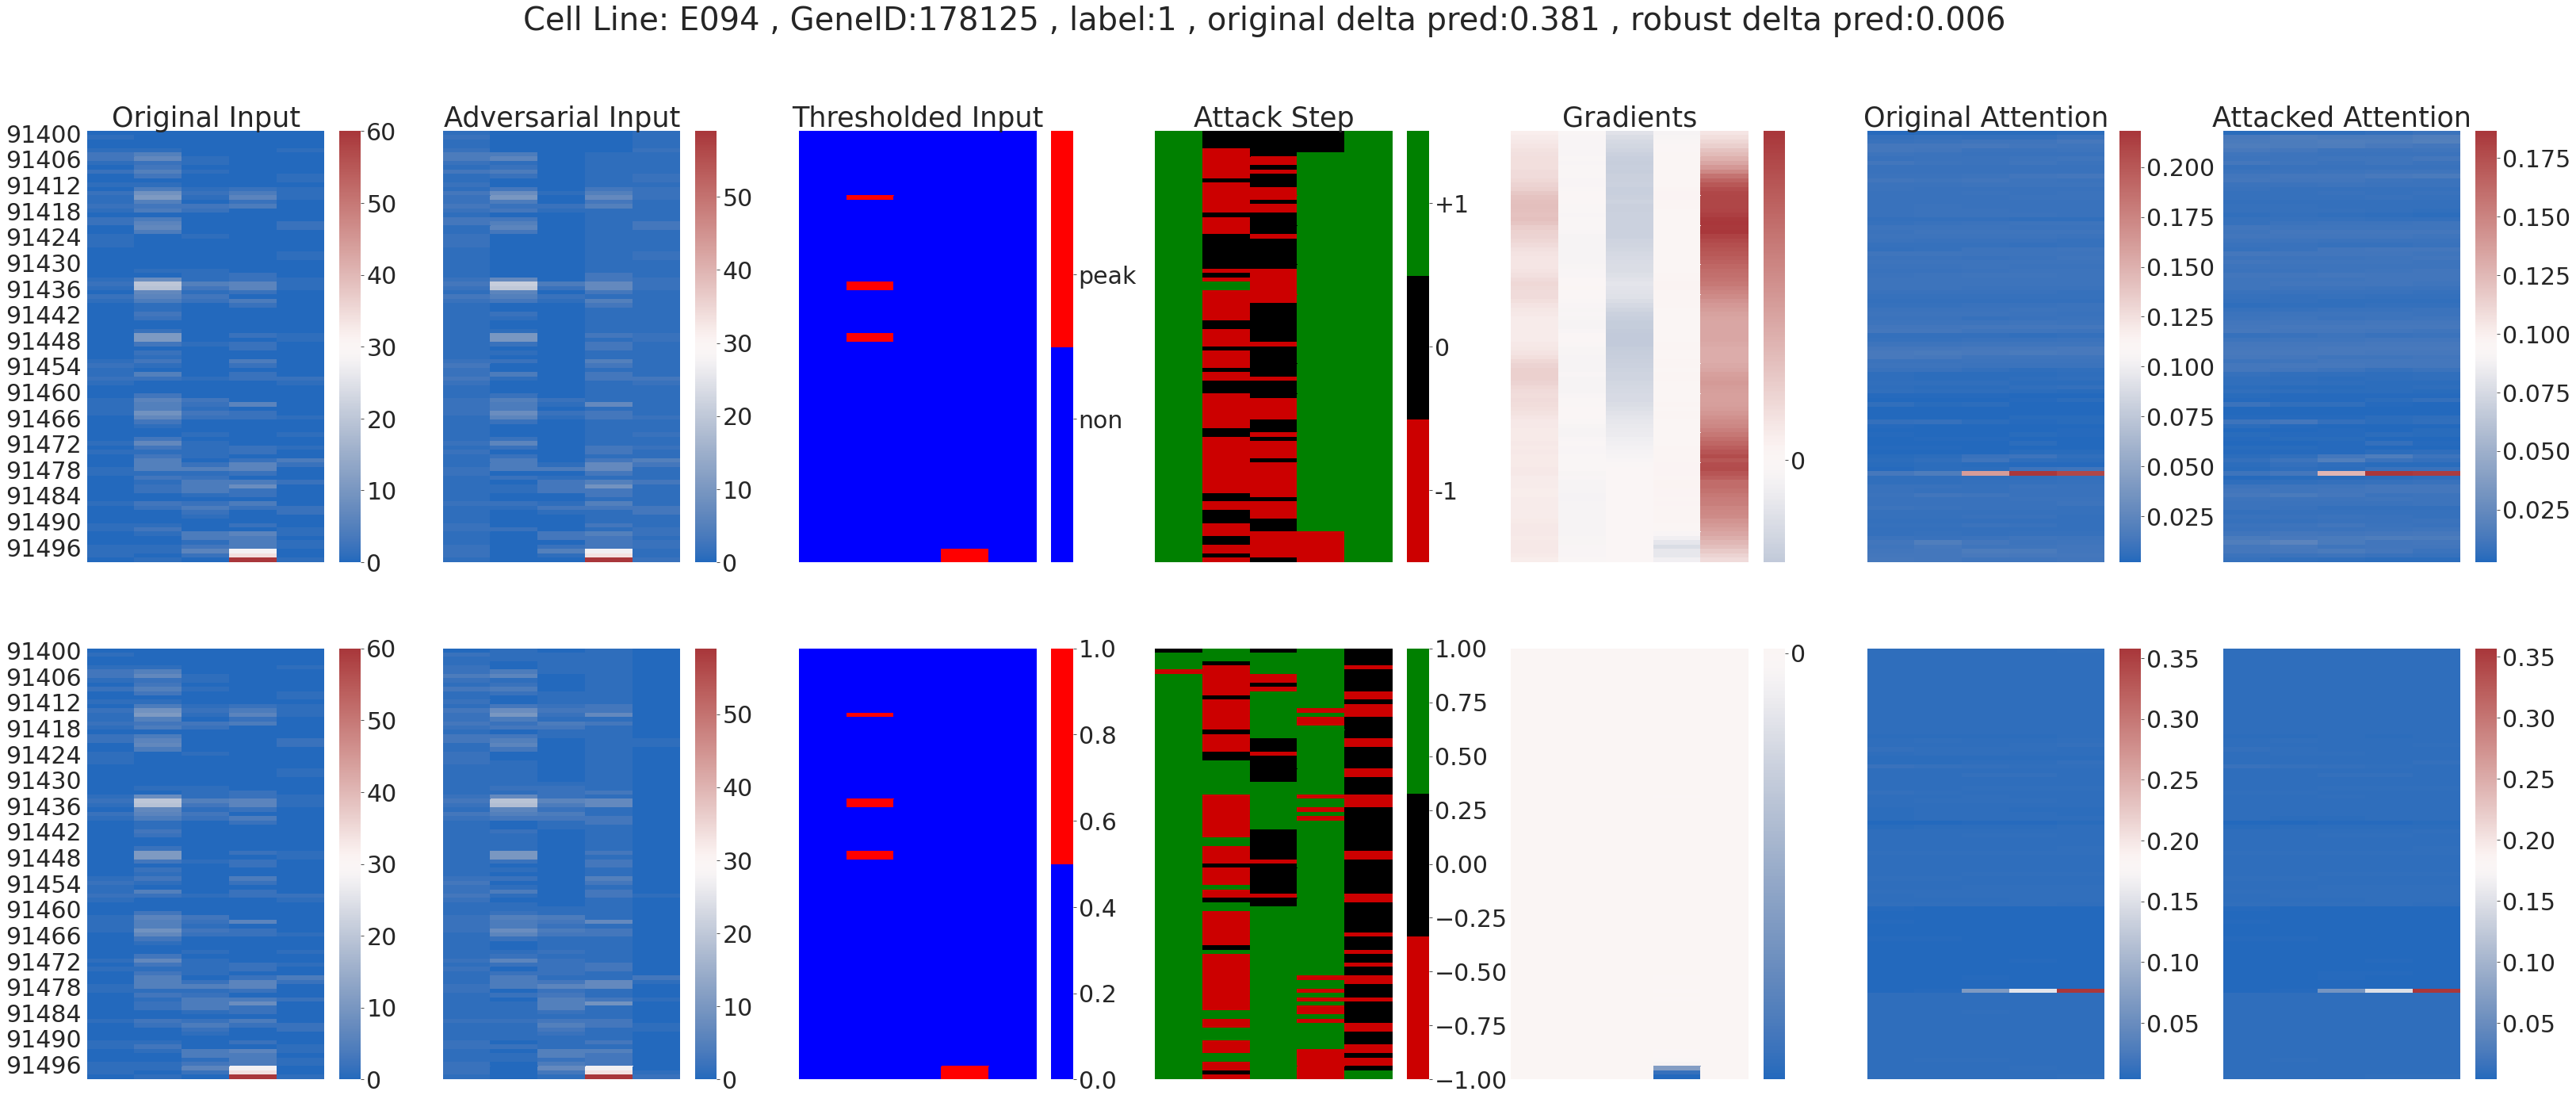

In [32]:
# CHOOSE WHICH GENE TO PLOT (number in range from 0-6599)
GENE_INDEXs = [0, 6375, 3055, 914]

for GENE_INDEX in GENE_INDEXs:
    g_ind = GENE_INDEX*100

    fig, axes = plt.subplots(2, 7, sharey=True, figsize=(55,22))
    fig.suptitle('Cell Line: ' + CELL_LINE + ' , GeneID:' + str(int(df['GeneID'].iloc[g_ind])) + ' , label:' 
                 + str(int(df['y'].iloc[g_ind])) + ' , original delta pred:' + str(np.abs(np.round(df['yho'].iloc[g_ind]-df['yha'].iloc[g_ind], 3)))
                 + ' , robust delta pred:' + str(np.abs(np.round(df_robust['yho'].iloc[g_ind]-df_robust['yha'].iloc[g_ind], 3))))
    axes[0,0].set_title('Original Input')
    axes[0,1].set_title('Adversarial Input')
    axes[0,2].set_title('Thresholded Input')
    axes[0,3].set_title('Attack Step')
    axes[0,4].set_title('Gradients')
    axes[0,5].set_title('Original Attention')
    axes[0,6].set_title('Attacked Attention')
    #axes[0].set_ylabel('Bins') # why isn't this showing up...

    myColors = ((0.8, 0.0, 0.0, 1.0), "black", "green")
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    binary_cmap = LinearSegmentedColormap.from_list('Custom', ('blue','red'), 2)

    sns.heatmap(df[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, yticklabels=False, ax=axes[0,0])
    sns.heatmap(df[['A1','A2','A3','A4','A5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[0,1])
    sns.heatmap(np.array(df[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)] > 10), cmap=binary_cmap, xticklabels=False, ax=axes[0,2])
    sns.heatmap(df[['e1','e2','e3','e4','e5']].iloc[g_ind:(g_ind+100)], cmap=cmap, center=0,xticklabels=False, ax=axes[0,3])
    sns.heatmap(df[['g1','g2','g3','g4','g5']].iloc[g_ind:(g_ind+100)], cmap="vlag", center=0, cbar_kws={"ticks":[0]}, xticklabels=False, ax=axes[0,4])
    sns.heatmap(df[['ao1', 'ao2', 'ao3', 'ao4', 'ao5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[0,5])
    sns.heatmap(df[['a1','a2','a3','a4','a5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[0,6])

    sns.heatmap(df_robust[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, yticklabels=False, ax=axes[1,0])
    sns.heatmap(df_robust[['A1','A2','A3','A4','A5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[1,1])
    sns.heatmap(np.array(df_robust[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)] > 10), cmap=binary_cmap, xticklabels=False, ax=axes[1,2])
    sns.heatmap(df_robust[['e1','e2','e3','e4','e5']].iloc[g_ind:(g_ind+100)], cmap=cmap, center=0,xticklabels=False, ax=axes[1,3])
    sns.heatmap(df_robust[['g1','g2','g3','g4','g5']].iloc[g_ind:(g_ind+100)], cmap="vlag", center=0, cbar_kws={"ticks":[0]}, xticklabels=False, ax=axes[1,4])
    sns.heatmap(df_robust[['ao1', 'ao2', 'ao3', 'ao4', 'ao5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[1,5])
    sns.heatmap(df_robust[['a1','a2','a3','a4','a5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[1,6])
    
    colorbar_binary = axes[0,2].collections[0].colorbar
    colorbar_binary.set_ticks([0.667, 0.333])
    colorbar_binary.set_ticklabels(['peak', 'non'])

    colorbar = axes[0,3].collections[0].colorbar
    colorbar.set_ticks([0.667, 0, -0.667])
    colorbar.set_ticklabels(['+1', '0', '-1'])


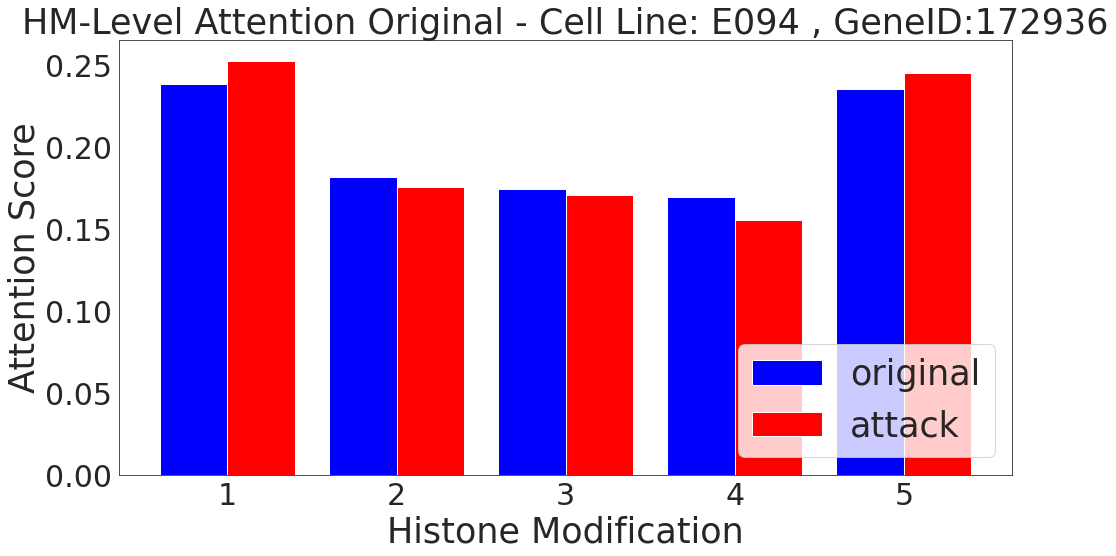

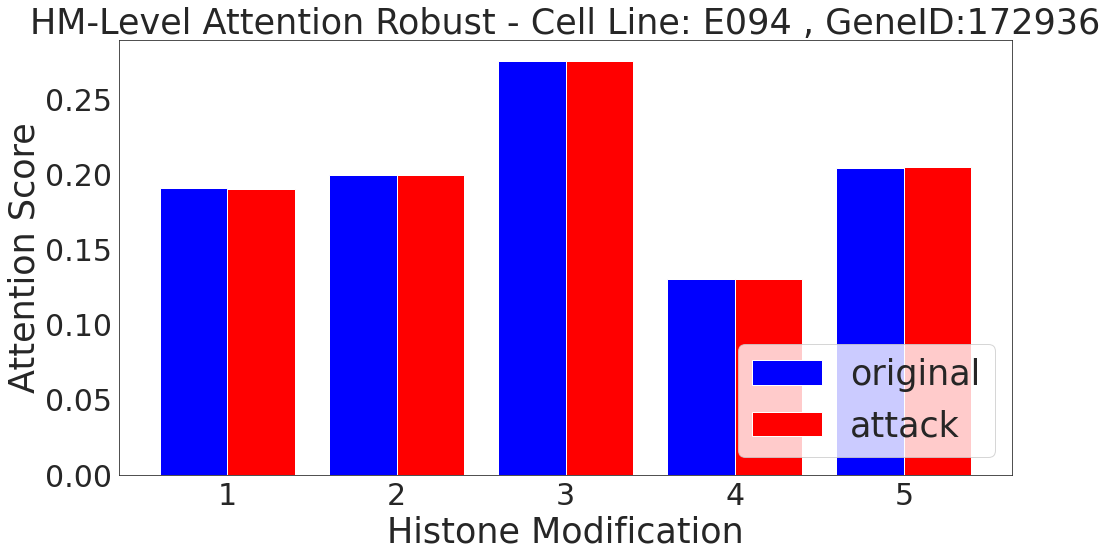

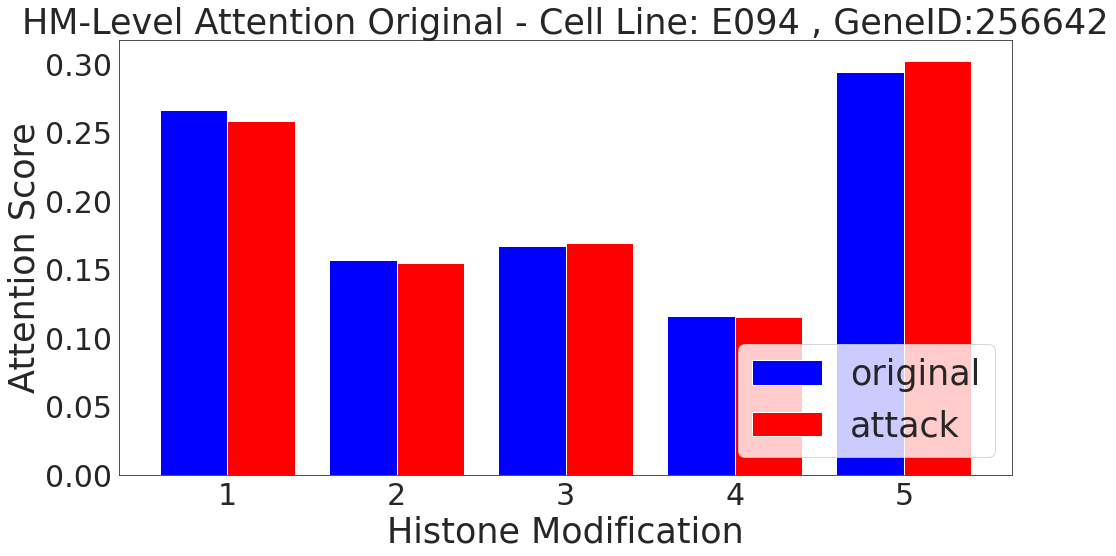

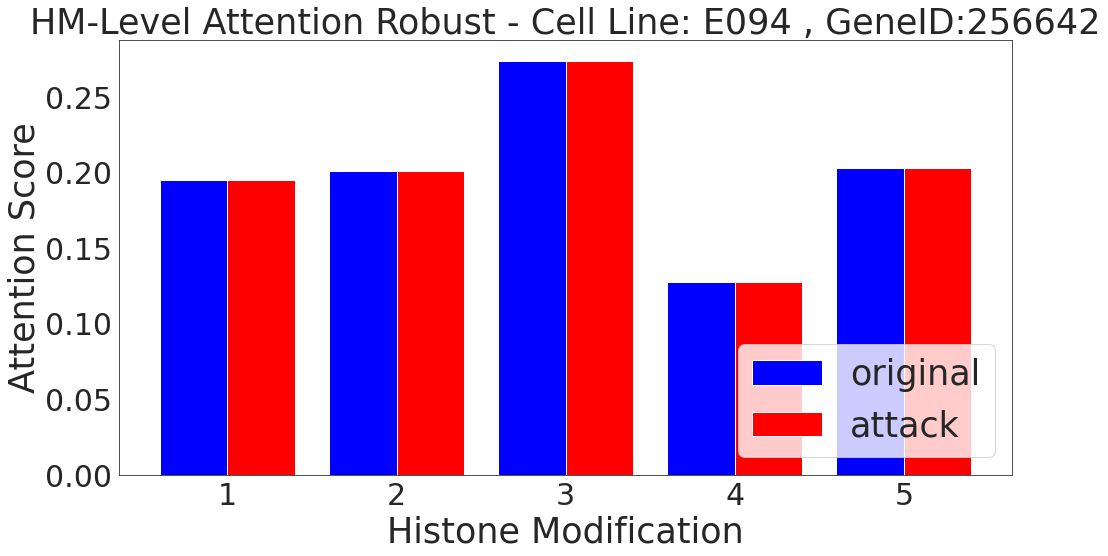

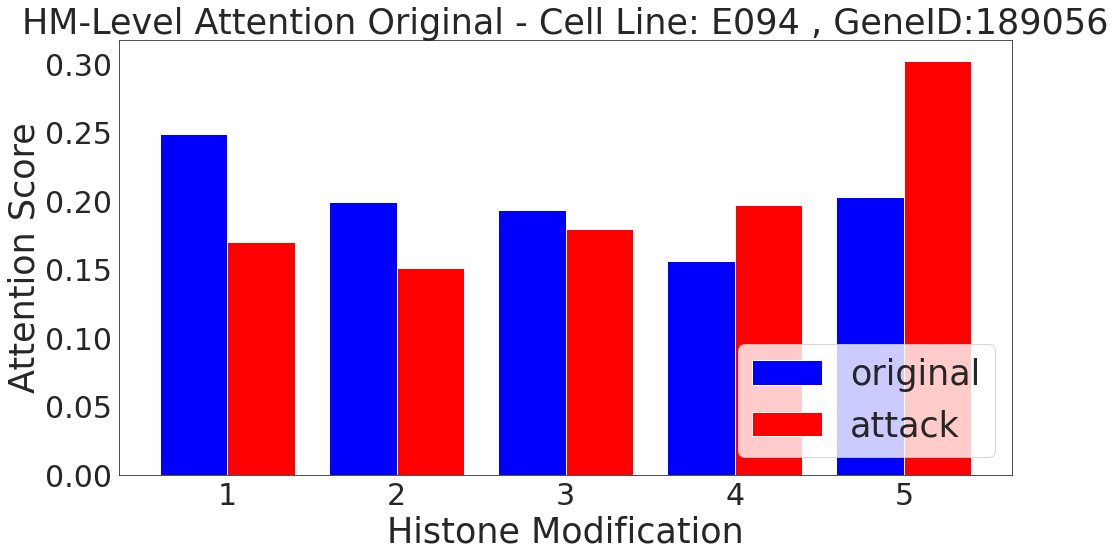

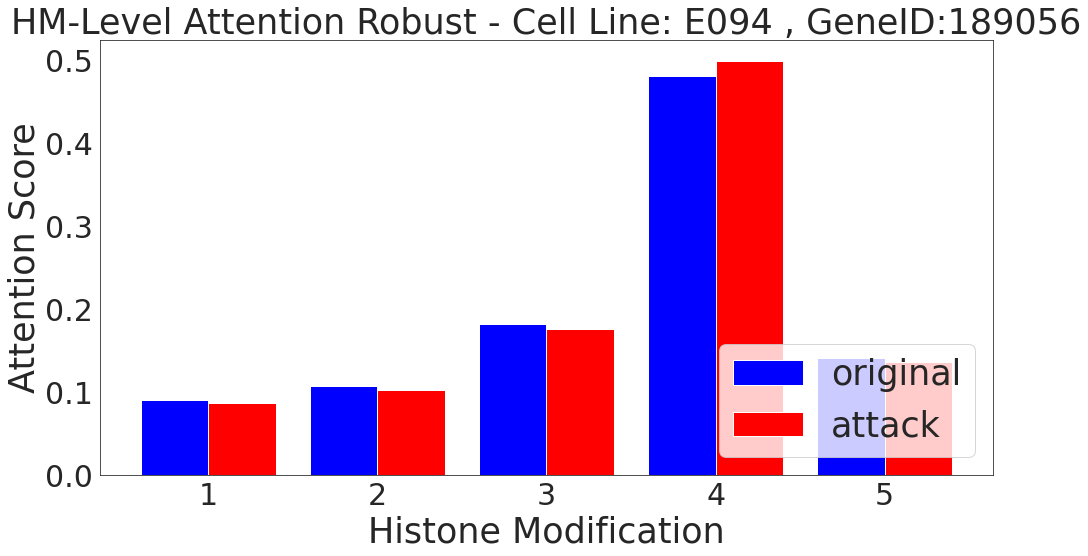

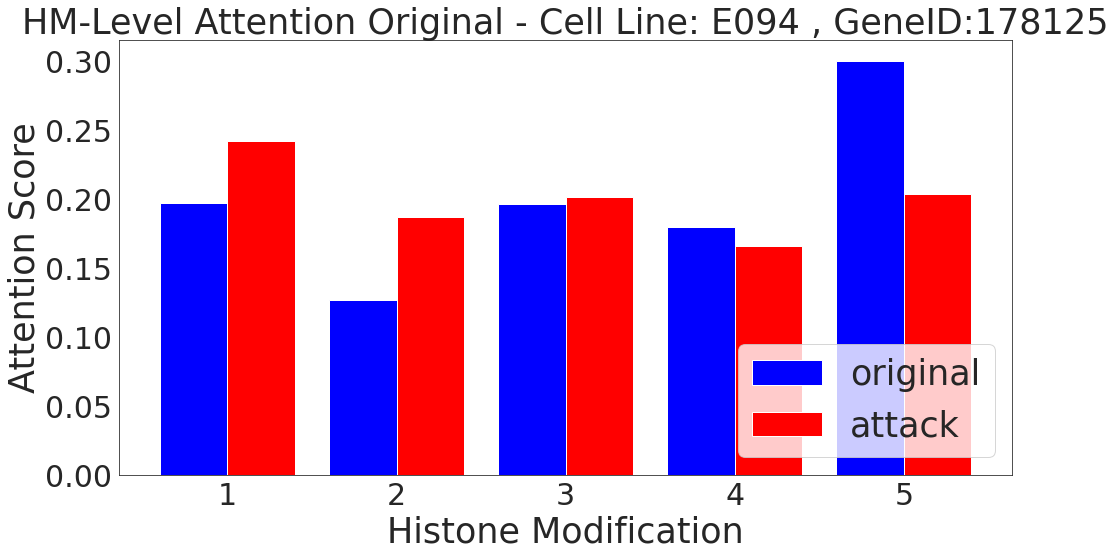

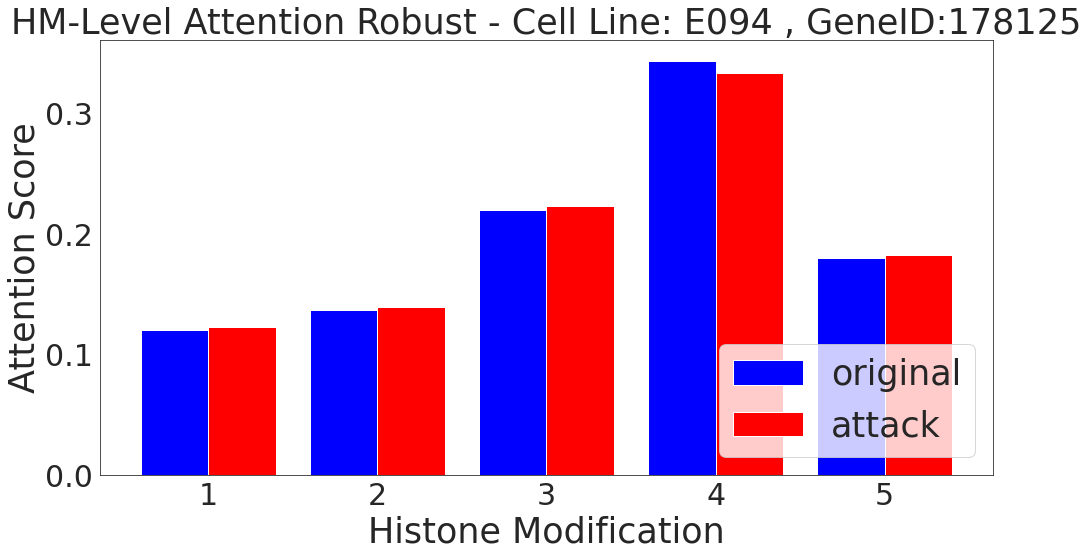

In [34]:
# CHOOSE WHICH GENE TO PLOT (number in range from 0-6599)
GENE_INDEXs = [0, 6375, 3055, 914]

for GENE_INDEX in GENE_INDEXs:
    data = [beta_df.iloc[GENE_INDEX], orig_beta_df.iloc[GENE_INDEX]]
    barWidth = 0.60
    gap = 1.5
    plt.figure(figsize=(16, 8))
    colors = ['blue', 'red']
    labels = ['original', 'attack']
    for i, results in enumerate(data):
      r = np.arange(len(results)) * gap + i * barWidth
      plt.bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels[i], linewidth=[1 for _ in results])

    plt.title('HM-Level Attention Original - ' + 'Cell Line: ' + CELL_LINE + ' , GeneID:' + str(beta_df.index[GENE_INDEX]))
    plt.xlabel('Histone Modification')
    plt.ylabel('Attention Score')
    plt.xticks([r * gap + 1/len(data) * barWidth for r in range(len(results))], np.arange(1,6))
    plt.legend(loc='lower right')
    plt.show()
    
    data = [beta_df_robust.iloc[GENE_INDEX], orig_beta_df_robust.iloc[GENE_INDEX]]
    barWidth = 0.60
    gap = 1.5
    plt.figure(figsize=(16, 8))
    colors = ['blue', 'red']
    labels = ['original', 'attack']
    for i, results in enumerate(data):
      r = np.arange(len(results)) * gap + i * barWidth
      plt.bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels[i], linewidth=[1 for _ in results])

    plt.title('HM-Level Attention Robust - ' + 'Cell Line: ' + CELL_LINE + ' , GeneID:' + str(beta_df.index[GENE_INDEX]))
    plt.xlabel('Histone Modification')
    plt.ylabel('Attention Score')
    plt.xticks([r * gap + 1/len(data) * barWidth for r in range(len(results))], np.arange(1,6))
    plt.legend(loc='lower right')
    plt.show()